In [1]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Ma'am sidra research/Healthcare monitoring using IoT /heart_2020_cleaned.csv")  # Please replace with your actual file path


In [3]:
# Convert categorical variables to numeric
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

In [4]:
# Split data into features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [5]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# Define the Dense model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [9]:
# Compile the Dense model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
# Train the Dense model
history_dense = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7995/7995 [==============================] - 22s 2ms/step - loss: 0.2320 - accuracy: 0.9155 - val_loss: 0.2344 - val_accuracy: 0.9133
Epoch 2/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2276 - accuracy: 0.9161 - val_loss: 0.2331 - val_accuracy: 0.9134
Epoch 3/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2267 - accuracy: 0.9163 - val_loss: 0.2330 - val_accuracy: 0.9133
Epoch 4/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2261 - accuracy: 0.9165 - val_loss: 0.2329 - val_accuracy: 0.9131
Epoch 5/10
7995/7995 [==============================] - 18s 2ms/step - loss: 0.2256 - accuracy: 0.9165 - val_loss: 0.2330 - val_accuracy: 0.9135
Epoch 6/10
7995/7995 [==============================] - 17s 2ms/step - loss: 0.2253 - accuracy: 0.9163 - val_loss: 0.2325 - val_accuracy: 0.9139
Epoch 7/10
7995/7995 [==============================] - 19s 2ms/step - loss: 0.2251 - accuracy: 0.9166 - val_loss: 0.2318 - val_ac

In [11]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, 2, activation='relu', input_shape=X_train_cnn.shape[1:]))  # Convolutional layer
model_cnn.add(Flatten())  # Flatten layer
model_cnn.add(Dense(32, activation='relu'))  # Dense layer
model_cnn.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
7995/7995 [==============================] - 24s 3ms/step - loss: 0.2302 - accuracy: 0.9156 - val_loss: 0.2324 - val_accuracy: 0.9137
Epoch 2/10
7995/7995 [==============================] - 20s 3ms/step - loss: 0.2269 - accuracy: 0.9162 - val_loss: 0.2320 - val_accuracy: 0.9136
Epoch 3/10
7995/7995 [==============================] - 23s 3ms/step - loss: 0.2261 - accuracy: 0.9161 - val_loss: 0.2323 - val_accuracy: 0.9136
Epoch 4/10
7995/7995 [==============================] - 22s 3ms/step - loss: 0.2255 - accuracy: 0.9164 - val_loss: 0.2309 - val_accuracy: 0.9138
Epoch 5/10
7995/7995 [==============================] - 20s 3ms/step - loss: 0.2251 - accuracy: 0.9162 - val_loss: 0.2307 - val_accuracy: 0.9132
Epoch 6/10
7995/7995 [==============================] - 24s 3ms/step - loss: 0.2247 - accuracy: 0.9163 - val_loss: 0.2312 - val_accuracy: 0.9139
Epoch 7/10
7995/7995 [==============================] - 20s 3ms/step - loss: 0.2244 - accuracy: 0.9166 - val_loss: 0.2308 - val_ac

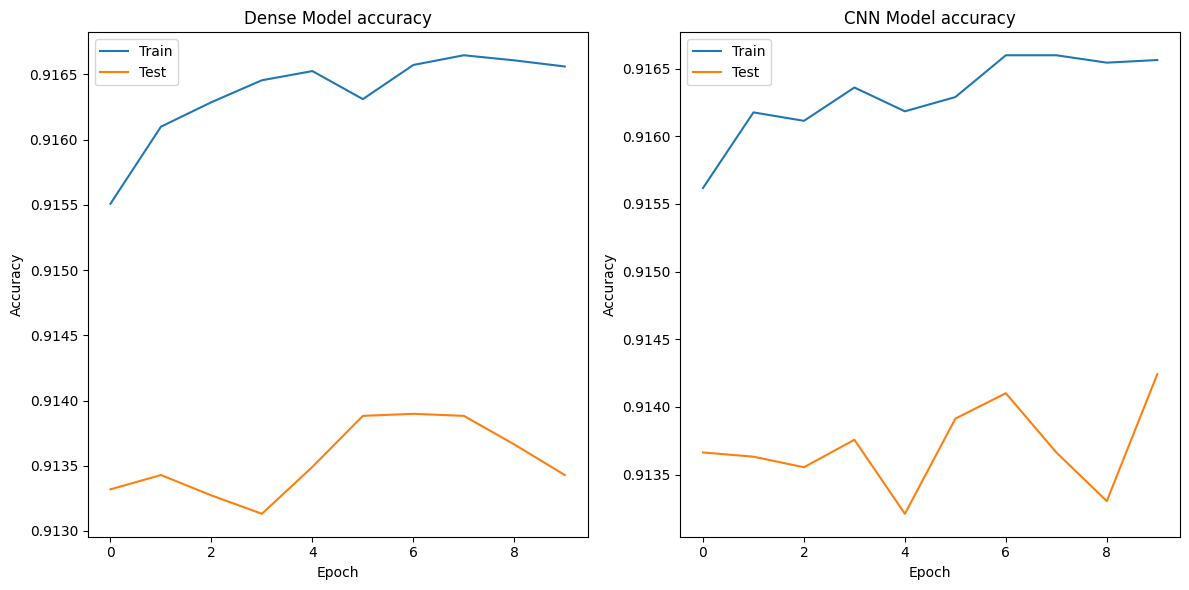

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('Dense Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



Evaluation Metrics for Dense Model:
1999/1999 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.08      0.14      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959



<Axes: >

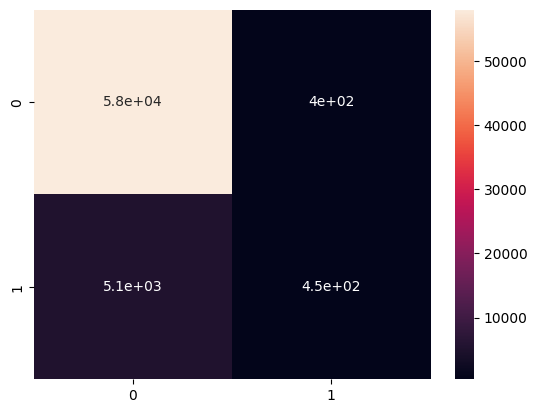

In [13]:
# Evaluate Dense Model
print("\nEvaluation Metrics for Dense Model:")
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)



Evaluation Metrics for CNN Model:
1999/1999 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.57      0.08      0.14      5592

    accuracy                           0.91     63959
   macro avg       0.74      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959



<Axes: >

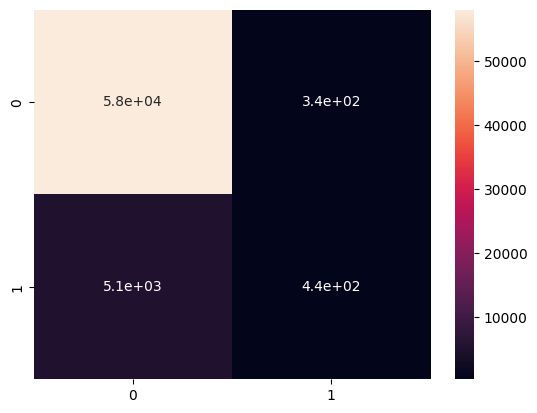

In [14]:
# Evaluate CNN Model
print("\nEvaluation Metrics for CNN Model:")
predictions_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")
print(classification_report(y_test, predictions_cnn))
cm_cnn = confusion_matrix(y_test, predictions_cnn)
sns.heatmap(cm_cnn, annot=True)

**Figures**

1999/1999 [==============================] - 3s 1ms/step


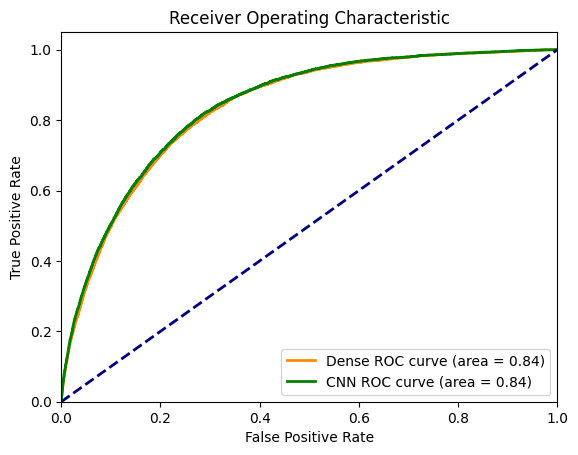

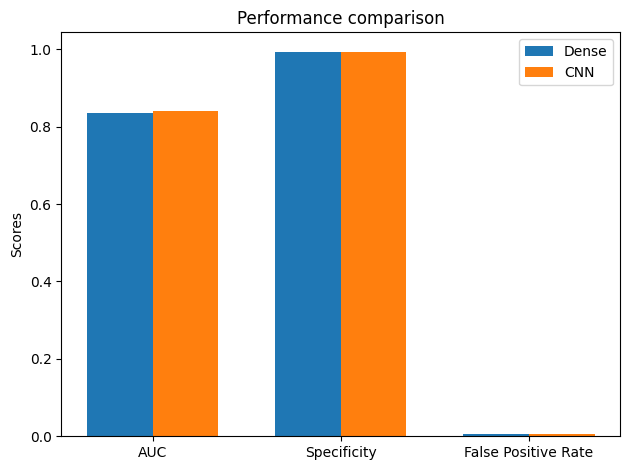

In [16]:
# Importing additional libraries
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Dense Model predictions as probabilities
pred_prob_dense = model.predict(X_test)

# CNN Model predictions as probabilities
pred_prob_cnn = model_cnn.predict(X_test_cnn)

# Calculate ROC curves and AUC scores
fpr_dense, tpr_dense, _ = roc_curve(y_test, pred_prob_dense)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, pred_prob_cnn)
roc_auc_dense = auc(fpr_dense, tpr_dense)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC Curves
plt.figure()
lw = 2
plt.plot(fpr_dense, tpr_dense, color='darkorange',
         lw=lw, label='Dense ROC curve (area = %0.2f)' % roc_auc_dense)
plt.plot(fpr_cnn, tpr_cnn, color='green',
         lw=lw, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate Specificity and False Positive rate
tn_dense, fp_dense, fn_dense, tp_dense = confusion_matrix(y_test, predictions).ravel()
specificity_dense = tn_dense / (tn_dense+fp_dense)
fpr_dense = 1 - specificity_dense

tn_cnn, fp_cnn, fn_cnn, tp_cnn = confusion_matrix(y_test, predictions_cnn).ravel()
specificity_cnn = tn_cnn / (tn_cnn+fp_cnn)
fpr_cnn = 1 - specificity_cnn

# Performance comparison
labels = ['AUC', 'Specificity', 'False Positive Rate']
dense_metrics = [roc_auc_dense, specificity_dense, fpr_dense]
cnn_metrics = [roc_auc_cnn, specificity_cnn, fpr_cnn]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dense_metrics, width, label='Dense')
rects2 = ax.bar(x + width/2, cnn_metrics, width, label='CNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
